# 使用python完成项目1的前提：学完pandas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [3]:
#如果csv文件和.py/.ipynb文件不在一个文件夹内，需要标明文件路径
df_china=pd.read_csv('C:\\Users\\lenovo\\Desktop\\results_china.csv')
#C:\\Users\\lenovo\\Desktop\\results_china.csv

In [5]:
#如果csv文件和.py/.ipynb文件在一个文件夹内，直接文件名即可，所以建议放在一个文件夹下
df_china=pd.read_csv('results_china.csv')

In [6]:
df_global=pd.read_csv('results_global.csv')
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [7]:
df_china.head()

,year,city,country,avg_temp
0,1829,Anshan,China,11.80
1,1830,Anshan,China,7.12
2,1831,Anshan,China,6.02
3,1832,Anshan,China,6.00
4,1833,Anshan,China,6.59


In [8]:
#查看各列数据有多少，是否有缺失值
df_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 4 columns):
year        6172 non-null int64
city        6172 non-null object
country     6172 non-null object
avg_temp    6125 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 193.0+ KB


In [10]:
#df_china['city']

In [11]:
#查看有多少个城市，返回城市列所有的唯一值（pandas的unique函数）
df_china['city'].unique()

array(['Anshan', 'Changchun', 'Changzhou', 'Chengdu', 'Dalian', 'Datong',
       'Foshan', 'Fuzhou', 'Guangzhou', 'Guiyang', 'Handan', 'Hangzhou',
       'Harbin', 'Hefei', 'Jilin', 'Jinan', 'Kunming', 'Lanzhou',
       'Luoyang', 'Nanchang', 'Nanjing', 'Nanning', 'Qingdao', 'Qiqihar',
       'Shanghai', 'Shenyang', 'Suzhou', 'Taiyuan', 'Tangshan', 'Tianjin',
       'Wuhan', 'Wuxi', 'Xian', 'Xuzhou'], dtype=object)

In [12]:
#定位到列的另一种写法，等同于上面那行代码
df_china.city.unique()

array(['Anshan', 'Changchun', 'Changzhou', 'Chengdu', 'Dalian', 'Datong',
       'Foshan', 'Fuzhou', 'Guangzhou', 'Guiyang', 'Handan', 'Hangzhou',
       'Harbin', 'Hefei', 'Jilin', 'Jinan', 'Kunming', 'Lanzhou',
       'Luoyang', 'Nanchang', 'Nanjing', 'Nanning', 'Qingdao', 'Qiqihar',
       'Shanghai', 'Shenyang', 'Suzhou', 'Taiyuan', 'Tangshan', 'Tianjin',
       'Wuhan', 'Wuxi', 'Xian', 'Xuzhou'], dtype=object)

In [13]:
#输出该列的所有类型值，及对应个数（pandas的value_counts）
df_china.city.value_counts()

Kunming      198
Tianjin      194
Changchun    194
Tangshan     194
Harbin       194
Taiyuan      194
Lanzhou      194
Xian         194
Qiqihar      194
Datong       194
Chengdu      194
Shenyang     185
Jilin        185
Anshan       185
Dalian       185
Jinan        174
Guangzhou    174
Luoyang      174
Nanning      174
Foshan       174
Handan       174
Guiyang      174
Changzhou    173
Xuzhou       173
Fuzhou       173
Wuxi         173
Suzhou       173
Wuhan        173
Nanjing      173
Hefei        173
Qingdao      173
Shanghai     173
Hangzhou     173
Nanchang     173
Name: city, dtype: int64

In [15]:
#筛选昆明的数据
df_kunming=df_china[df_china.city=='Kunming']

In [16]:
df_kunming.head()

,year,city,country,avg_temp
2893,1816,Kunming,China,14.15
2894,1817,Kunming,China,13.13
2895,1818,Kunming,China,13.81
2896,1819,Kunming,China,13.15
2897,1820,Kunming,China,14.11


In [17]:
df_kunming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 2893 to 3090
Data columns (total 4 columns):
year        198 non-null int64
city        198 non-null object
country     198 non-null object
avg_temp    188 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ KB


avg_temp 188，说明有缺失值，可以先看缺失值在哪些年

In [18]:
#将昆明值降序排列
df_kunming=df_kunming.sort_values(by='year')

In [19]:
df_kunming.head(10)

,year,city,country,avg_temp
2893,1816,Kunming,China,14.15
2894,1817,Kunming,China,13.13
2895,1818,Kunming,China,13.81
2896,1819,Kunming,China,13.15
2897,1820,Kunming,China,14.11
2898,1821,Kunming,China,14.14
2899,1822,Kunming,China,14.29
2900,1823,Kunming,China,14.37
2901,1824,Kunming,China,NaN
2902,1825,Kunming,China,NaN


In [20]:
#筛选所有avg_temp列为缺失值的行（空 null）
df_kunming[df_kunming.avg_temp.isnull()]

,year,city,country,avg_temp
2901,1824,Kunming,China,NaN
2902,1825,Kunming,China,NaN
2903,1826,Kunming,China,NaN
2904,1827,Kunming,China,NaN
2905,1828,Kunming,China,NaN
2906,1829,Kunming,China,NaN
2907,1830,Kunming,China,NaN
2908,1831,Kunming,China,NaN
2909,1832,Kunming,China,NaN
2916,1839,Kunming,China,NaN


In [21]:
#看到主要集中在1839年以前，因此取这一年以后的数据
df_kunming=df_kunming[df_kunming.year>1839]

In [22]:
df_kunming.head()

,year,city,country,avg_temp
2917,1840,Kunming,China,13.99
2918,1841,Kunming,China,14.21
2919,1842,Kunming,China,14.09
2920,1843,Kunming,China,14.20
2921,1844,Kunming,China,13.74


In [23]:
df_kunming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 2917 to 3090
Data columns (total 4 columns):
year        174 non-null int64
city        174 non-null object
country     174 non-null object
avg_temp    174 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [36]:
#求昆明的移动平均值（用rolling函数，时间序列，选5年求平均）
df_kunming['rolling_avg_kunming']=df_kunming.avg_temp.rolling(5).mean()

In [37]:
df_kunming.head()
#新增一列，rolling_avg，1840-1843年没数据，1844年的rolling_avg=14.046=（13.99+14.21+14.09+14.20+13.74）/5

,year,city,country,avg_temp,rolling_avg,rolling_avg_kunming
2917,1840,Kunming,China,13.99,NaN,NaN
2918,1841,Kunming,China,14.21,NaN,NaN
2919,1842,Kunming,China,14.09,NaN,NaN
2920,1843,Kunming,China,14.20,NaN,NaN
2921,1844,Kunming,China,13.74,14.046,14.046


In [38]:
df_global.info()
#全球数据的avg_temp 没有缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 3 columns):
year             266 non-null int64
avg_temp         266 non-null float64
rolling_avg_g    262 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.3 KB


In [39]:
#想知道数据最早的是哪一年，按年份升序排列
df_global=df_global.sort_values(by='year')

In [40]:
df_global.head(1)

,year,avg_temp,rolling_avg_g
0,1750,8.72,NaN


In [41]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 3 columns):
year             266 non-null int64
avg_temp         266 non-null float64
rolling_avg_g    262 non-null float64
dtypes: float64(2), int64(1)
memory usage: 8.3 KB


In [42]:
#计算全球气温的移动平均值
df_global['rolling_avg_global']=df_global.avg_temp.rolling(5).mean()
df_global.head()

,year,avg_temp,rolling_avg_g,rolling_avg_global
0,1750,8.72,NaN,NaN
1,1751,7.98,NaN,NaN
2,1752,5.78,NaN,NaN
3,1753,8.39,NaN,NaN
4,1754,8.47,7.868,7.868


In [43]:
#难点，把昆明的移动平均值和全球的移动平均值放到一个表里（merge函数）。以year为参照，因为昆明是从1840年开始的，所以合并后的数据从1840年开始。
df=df_kunming.merge(df_global,how='left',on='year')

In [44]:
df.head()

,year,city,country,avg_temp_x,rolling_avg,rolling_avg_kunming,avg_temp_y,rolling_avg_g,rolling_avg_global
0,1840,Kunming,China,13.99,NaN,NaN,7.80,7.604,7.604
1,1841,Kunming,China,14.21,NaN,NaN,7.69,7.602,7.602
2,1842,Kunming,China,14.09,NaN,NaN,8.02,7.730,7.730
3,1843,Kunming,China,14.20,NaN,NaN,8.17,7.862,7.862
4,1844,Kunming,China,13.74,14.046,14.046,7.65,7.866,7.866


上图为合并后的数据，因为how='left',所以昆明的在左边，全球的在右边，因为都是avg_temp列，自动变成avg_temp_x和avg_temp_y。
故，avg_temp_x代表昆明每年的气温值，avg_temp_y代表昆明全球每年的气温值。rolling_avg是上面求出来的昆明的移动平均值，rolling_avg_g是上面求出来的全球的移动平均值。

In [45]:
#合并后的数据集的情况
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 173
Data columns (total 9 columns):
year                   174 non-null int64
city                   174 non-null object
country                174 non-null object
avg_temp_x             174 non-null float64
rolling_avg            170 non-null float64
rolling_avg_kunming    170 non-null float64
avg_temp_y             174 non-null float64
rolling_avg_g          174 non-null float64
rolling_avg_global     174 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 13.6+ KB


In [46]:
df.head()

,year,city,country,avg_temp_x,rolling_avg,rolling_avg_kunming,avg_temp_y,rolling_avg_g,rolling_avg_global
0,1840,Kunming,China,13.99,NaN,NaN,7.80,7.604,7.604
1,1841,Kunming,China,14.21,NaN,NaN,7.69,7.602,7.602
2,1842,Kunming,China,14.09,NaN,NaN,8.02,7.730,7.730
3,1843,Kunming,China,14.20,NaN,NaN,8.17,7.862,7.862
4,1844,Kunming,China,13.74,14.046,14.046,7.65,7.866,7.866


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


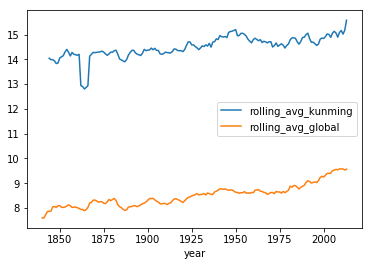

In [48]:
#对比昆明和全球的5年移动平均值数据，plot函数
df.plot(x='year',y=['rolling_avg_kunming','rolling_avg_global'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


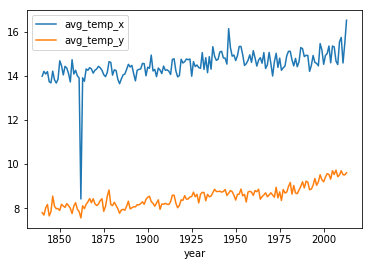

In [50]:
#为什么要计算移动平均值，为什么不直接看每年的气温差异。对比昆明和全球每年的气温数据
df.plot(x='year',y=['avg_temp_x','avg_temp_y'])

对比5年气温的移动平均值和每年的气温趋势，发现趋势基本一致，但每年的波动更为剧烈（可能存在极大值），5年移动平均值更为平滑，如果是10年，会更平滑。